In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
from wordcloud import WordCloud
import warnings

In [2]:
from google.colab import files
data = files.upload()

Saving medium_data.csv to medium_data.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(data['medium_data.csv']))

In [5]:
df.head(n=10)

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30
5,6,https://towardsdatascience.com/an-easy-introdu...,An Easy Introduction to SQL for Data Scientists,NaN,6.jpeg,563,1,8,Towards Data Science,2019-05-30
6,7,https://towardsdatascience.com/hypothesis-test...,Hypothesis testing visualized,Literally seeing how stat tests work,7.gif,276,1,12,Towards Data Science,2019-05-30
7,8,https://towardsdatascience.com/introduction-to...,Introduction to Latent Matrix Factorization Re...,NaN,8.png,126,2,5,Towards Data Science,2019-05-30
8,9,https://towardsdatascience.com/which-2020-cand...,Which 2020 Candidate is the Best at Twitter?,A Data Analysis of the 2020 Democratic Candida...,9.png,188,3,8,Towards Data Science,2019-05-30
9,10,https://towardsdatascience.com/what-if-ai-mode...,What if AI model understanding were easy?,See analytics-for-AI in action in this What-I...,10.jpg,493,2,8,Towards Data Science,2019-05-30


POPULAR ARTICLES


In [6]:
top20_articles = df.sort_values(["claps"],ascending=0)[0:20]
top20_articles.reset_index(drop=True, inplace=True)
top20_articles

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,4553,https://medium.com/swlh/i-have-15-ideas-to-cha...,I Have 15 ideas To Change Your Life. Do you Ha...,NaN,4553.png,38000,170,5,The Startup,2019-05-20
1,1282,https://medium.com/better-marketing/how-to-han...,How To Handle Other People’s Bad Moods Like a Pro,Step 1: Treat difficult emotions like a puzzle...,1282.jpeg,23000,74,7,Better Marketing,2019-09-11
2,1004,https://medium.com/swlh/if-you-learn-to-write-...,"<strong class=""markup--strong markup--h3-stron...",The secret is in the line.,1004.jpeg,20000,78,6,The Startup,2019-10-14
3,3593,https://medium.com/swlh/how-to-break-a-negativ...,How To Break A Negative Thought Loop,“It’s pretty black-and-white. You either let g...,3593.png,16400,58,4,The Startup,2019-07-21
4,5934,https://writingcooperative.com/10-things-to-do...,10 Things To Do When Medium Doesn’t Curate You...,"When I have a curation gap, I go into my…",5934.jpeg,12600,117,5,The Writing Cooperative,2019-03-18
5,39,https://medium.com/swlh/how-to-retain-more-fro...,How To Retain More From The Books You Read,Making sure you get the most out of reading.,39.png,11700,58,5,The Startup,2019-05-30
6,672,https://medium.com/swlh/the-only-3-types-of-wr...,The Only 3 Types of Writing People Actually Wa...,NaN,672.jpg,11300,76,5,The Startup,2019-04-07
7,3806,https://medium.com/better-marketing/to-be-well...,"<strong class=""markup--strong markup--h3-stron...","<strong class=""markup--strong markup--h4-stron...",3806.jpeg,10800,41,4,Better Marketing,2019-08-08
8,3684,https://uxdesign.cc/10-best-chrome-extensions-...,10 best Chrome extensions for designers,"After months of testing, here are the 10 best ...",3684.png,10500,53,5,UX Collective,2019-08-08
9,4041,https://medium.com/swlh/how-to-write-and-publi...,How to Write and Publish Articles that get Not...,Simple techniques for creating content that’s ...,4041.jpeg,10100,82,11,The Startup,2019-04-30


PLOT OF ARTICLE DISTRIBUTION BY PUBLICATIONS

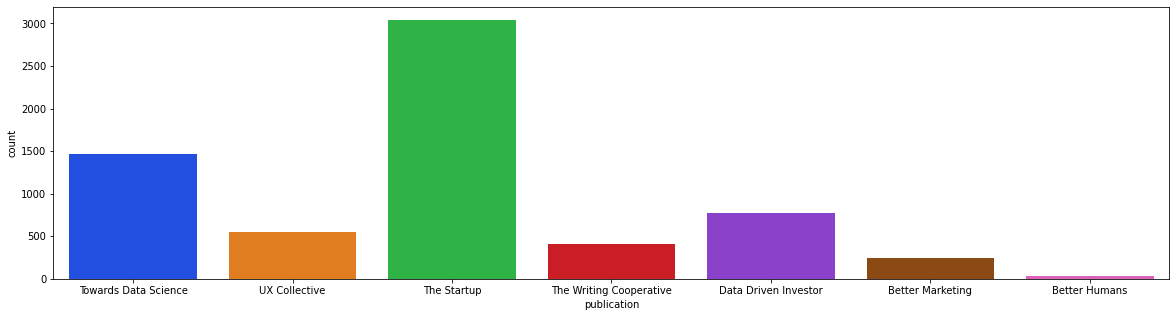

In [7]:
plt.figure(figsize=(20,5))
sns.countplot("publication", data=df, palette="bright")

#Observation : The Startup ranks the #1 and Towards Data Science ranks #2

AVERAGE RESPONSES FROM DIFFERENT PUBLICATIONS.
QUES : IS IT WORTH WRITING ON TOWARDS DATA SCIENCE?

In [8]:
avg = df.groupby(by="publication").mean()[["claps"]]
avg.sort_values(["claps"],ascending=False)

,claps
publication,
Better Humans,1827.785714
Better Marketing,829.347107
UX Collective,380.924324
The Writing Cooperative,372.744417
The Startup,303.403815
Towards Data Science,283.631759
Data Driven Investor,95.034704


According to the above analysis, medium bloggers should start writing on Better Humans since they recieve more reaction from readers on an average.

TEXT ANALYSIS

In [14]:
nltk.download('stopwords')
import unicodedata
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

def remove_stopwords(text):
    filtered_text = []
    for i in text.split():
        i = i.strip().lower()
        if i not in stop_words:
            filtered_text.append(i)
    filtered_text = ' '.join(filtered_text)    
    return filtered_text

def normalize_accented_characters(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf8')
    return text

def normalize_text(text):
    text = remove_punct(text)
    text = remove_stopwords(text)
    text = normalize_accented_characters(text)
    return text  
 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df_data_science = df[df["publication"]=="Towards Data Science"]
df_data_science["title"] = df_data_science["title"].astype(str) + df_data_science["subtitle"].astype(str)
df_data_science.drop(columns=["subtitle","id","url","image","publication"],inplace=True)
df_data_science["title"] = df_data_science["title"].apply(normalize_text)
df_data_science

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,title,claps,responses,reading_time,date
0,beginners guide word embedding gensim wordvec ...,850,8,8,2019-05-30
1,handson graph neural networks pytorch pytorch ...,1100,11,9,2019-05-30
2,use ggplot pythona grammar graphics python,767,1,5,2019-05-30
3,databricks save files csv local computerwhen w...,354,0,4,2019-05-30
4,stepbystep implementation gradient descent bac...,211,3,4,2019-05-30
...,...,...,...,...,...
6375,brain mysterynan,118,0,7,2019-12-05
6376,machine learning lincoln ahead timenan,236,1,3,2019-12-05
6377,ai us opera experiencenan,1,0,4,2019-12-05
6378,digital skills service dsaashave ever think fu...,0,0,6,2019-12-05


TOPIC MODELING

In [16]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_df=0.6,min_df=2)
doc_term_matrix = count_vect.fit_transform(df_data_science["title"].values)
doc_term_matrix

<1461x1366 sparse matrix of type '<class 'numpy.int64'>'
	with 7994 stored elements in Compressed Sparse Row format>

LDA 

In [18]:
from sklearn.decomposition import LatentDirichletAllocation
#required to specify number of topics in LDA
number_topics = 3
number_words = 20
LDA = LatentDirichletAllocation(n_components=number_topics, n_jobs=-1)
LDA.fit(doc_term_matrix)
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
print("Topics:")
print_topics(LDA, count_vect, number_words)     

Topics:

Topic #0:
data science classmarkupstrong ai strong artificial intelligence language need know python world new introduction top computer way make and scientist

Topic #1:
using python data analysis neural use guide nan introduction part simple text networks decision google model classmarkupstrong pythonnan web used

Topic #2:
learning machine deep neural using ai network model regression part detection ml series time tensorflow models reinforcement linear the networks


In [19]:
!pip install pyLDAvis #visualizing LDA

     |████████████████████████████████| 1.6MB 4.5MB/s 
     |████████████████████████████████| 552kB 31.1MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=3759a90faabb871fd46700b3c81024bd3bb1b64a443a26e64499dee44127dcc4
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=cad44535ab1e7c83fb67753fbf8943a80490c9a40a45f5b672118309a1394365
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [20]:
import pyLDAvis
import pyLDAvis.sklearn
from pyLDAvis import sklearn as sklearn_lda
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()
LDAvis = sklearn_lda.prepare(LDA, doc_term_matrix, count_vect)
#run the visualization [mds is a function to use for visualizing the "distance" between topics]
LDAvis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.167121 -0.088091       1        1  35.640392
0     -0.177393 -0.073627       2        1  32.851065
1      0.010271  0.161718       3        1  31.508543, topic_info=                   Term        Freq       Total Category  logprob  loglift
680            learning  195.000000  195.000000  Default  30.0000  30.0000
294                data  306.000000  306.000000  Default  29.0000  29.0000
724             machine  148.000000  148.000000  Default  28.0000  28.0000
1068            science   88.000000   88.000000  Default  27.0000  27.0000
315                deep   83.000000   83.000000  Default  26.0000  26.0000
...                 ...         ...         ...      ...      ...      ...
859                 one   10.288473   16.298488   Topic3  -5.5562   0.6949
791               model   13.699939   49.128923   Topic3  -5.2699  -0.1221
210   classmarkupstrong   13.098850   58.535921   Topic3  -5.3147  -0.3422
163            building   10.687400   24.079245   Topic3  -5.5182   0.3426
1172             strong   11.472645   46.472590   Topic3  -5.4473  -0.2440

[179 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
17        2  0.869395  adversarial
24        1  0.470968           ai
24        2  0.524793           ai
24        3  0.013456           ai
26        2  0.828027        ainan
...     ...       ...          ...
1348      2  0.927304         work
1352      2  0.948218        world
1355      1  0.867071        write
1360      1  0.946087         year
1360      3  0.105121         year

[202 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

In [23]:
#Allocate articles into topics.
topic_values = LDA.transform(doc_term_matrix)
df_data_science['topic'] = topic_values.argmax(axis=1)
df_data_science.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,claps,responses,reading_time,date,topic
0,beginners guide word embedding gensim wordvec ...,850,8,8,2019-05-30,2
1,handson graph neural networks pytorch pytorch ...,1100,11,9,2019-05-30,2
2,use ggplot pythona grammar graphics python,767,1,5,2019-05-30,1
3,databricks save files csv local computerwhen w...,354,0,4,2019-05-30,0
4,stepbystep implementation gradient descent bac...,211,3,4,2019-05-30,1
5,easy introduction sql data scientistsnan,563,1,8,2019-05-30,0
6,hypothesis testing visualizedliterally seeing ...,276,1,12,2019-05-30,0
7,introduction latent matrix factorization recom...,126,2,5,2019-05-30,2
8,candidate best twittera data analysis democrat...,188,3,8,2019-05-30,0
9,ai model understanding easysee analyticsforai ...,493,2,8,2019-05-30,2


WHICH TOPICS ARE MOST LIKELY TO GET ATTENTION?

In [26]:
df_data_science["topic"].replace(0,"Deep Learning and AI",inplace=True)
df_data_science["topic"].replace(1,"General Data Analysis",inplace=True)
df_data_science["topic"].replace(2,"Machine Learning Modeling",inplace=True)
avg_claps_by_topic = df_data_science.groupby(by=["topic"]).mean()["claps"].reset_index()
avg_reading_time_by_topic = df_data_science.groupby(by=["topic"]).mean
print(avg_claps_by_topic) # No significant difference.


                       topic       claps
0       Deep Learning and AI  263.275862
1      General Data Analysis  302.196507
2  Machine Learning Modeling  286.637255
<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f84e16e4f28>>


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f84e16e4f28>>
